# Task 1 - Upload Libraries

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

# TASK 2: Upload the Variable

As a case study our objective in this project is to implement Linear Regression utilizing a single variable to predict the profits of a bike-sharing startup.

Working as a CEO with data of sales and population of data. Goal is to figure out which city is best to expand into

In [3]:
data = pd.read_csv('/content/bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# Task 3 - Visualize the Data

Use a scatterplot since we only have 2 columns


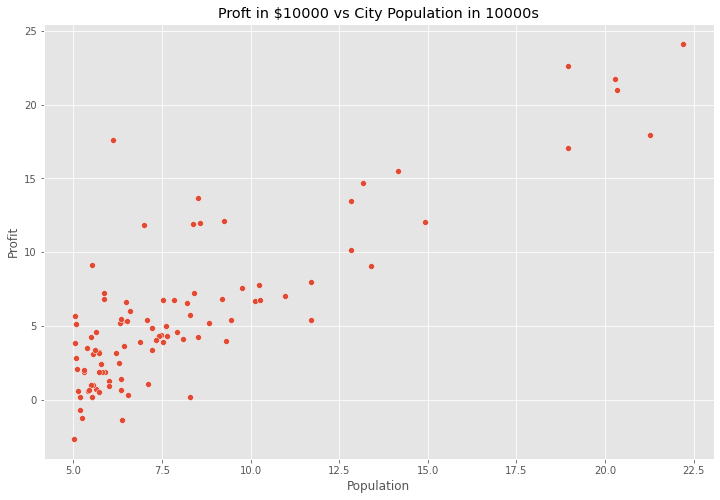

In [5]:
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Proft in $10000 vs City Population in 10000s");

#Task 4 - Compute the Cost J($\theta$)

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
#Implementation of our cost function
def cost_function(X, y, theta): #x & y represent the examples of our training set
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2 # error
    
    return 1 / (2 * m) * np.sum(error)

In [7]:
m = data.Population.values.size #length of our label vector
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m,1), axis = 1) #adding the ones to accomadate the intercept terms, reshape to columns
y = data.Profit.values.reshape(m, 1) # reshape in order for matrix multiplication to be valid
theta = np.zeros((2,1)) #initialize theta values to all 0s

cost_function(X, y, theta) # Cost of 

32.072733877455676

gradient descent is learning to minimize the cost function J of Theta. As we perform gradient descent it is useful to monitor the convergence by computing the cost at each step. 

What we just did was create a function to evaluate j of theta to check the convergence of our gradient descent. 

#Task 5 - Gradient Descent
Batch gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [8]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error #theta is modified with each iteration of GD, so it has to be subtracted
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [9]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations = 2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)),
                                str(round(theta[1,0], 2))))
#get back out x & y intercepts

h(x) = -3.79 + 1.18x1


# Task 6 - Visualizing the Cost Function

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

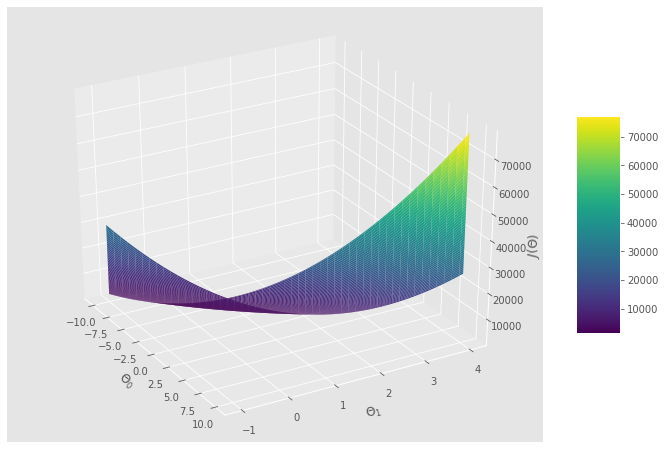

In [19]:
#produce surface plot of the cost function

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,330)

plt.show()

the purpose of this graph is to show you how the values of the costs J theta varies with changes in theta0 & theta1.

You can see the global minimum. Optimum values for parameters of theta0 & theta1

# Task 7 - Plotting the Convergence

Plot J($\theta$) against the number of iterations of gradient descent:

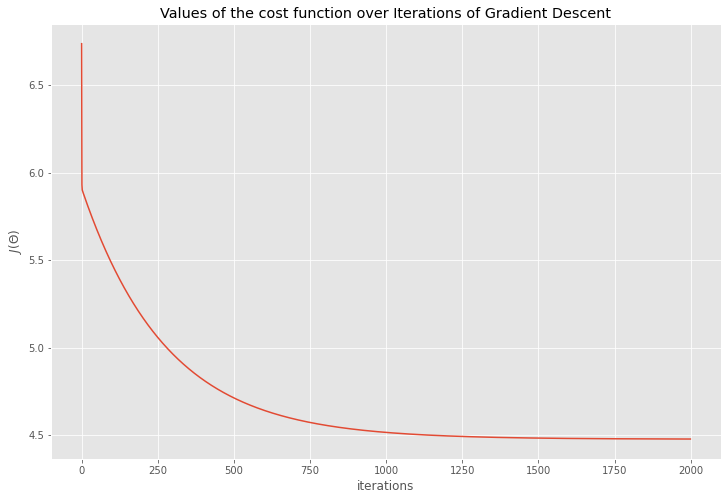

In [22]:
plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the cost function over Iterations of Gradient Descent");

# Task 8 - Training Data with Linear Regression Fit

In [23]:
theta.shape

(2, 1)

In [24]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


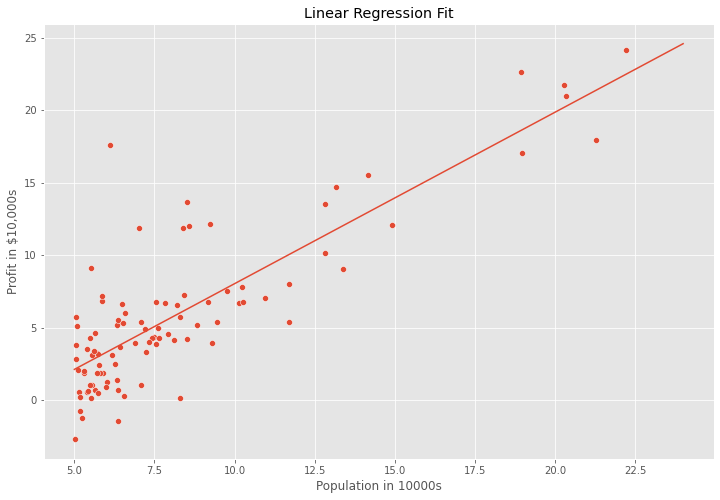

In [26]:
theta = np.squeeze(theta)
ax = sns.scatterplot(x="Population", y="Profit", data=data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0])for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");


# Task 9 -  Inference using the optimized (Θ) values

$h_\theta(x) = \theta^Tx$

In [29]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred



In [30]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [31]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
